<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/Predictive_Maintanance_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**#

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading Data**#

In [74]:
errors= pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_errors.csv')
failures = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_failures.csv')
machines = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_machines.csv')
maint = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_maint.csv')
telemetry = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv')

#**EDA**#

In [75]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [76]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [77]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [78]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [79]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [80]:
# Checking for missiong values

In [81]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [82]:
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [83]:
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [84]:
maint.isna().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [85]:
telemetry.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

**EDA on Errors**

In [86]:
errors.shape

(3919, 3)

In [87]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [88]:
# Converting object to datetime

errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

In [89]:
errors.describe

<bound method NDFrame.describe of                 datetime  machineID errorID
0    2015-01-03 07:00:00          1  error1
1    2015-01-03 20:00:00          1  error3
2    2015-01-04 06:00:00          1  error5
3    2015-01-10 15:00:00          1  error4
4    2015-01-22 10:00:00          1  error4
...                  ...        ...     ...
3914 2015-11-21 08:00:00        100  error2
3915 2015-12-04 02:00:00        100  error1
3916 2015-12-08 06:00:00        100  error2
3917 2015-12-08 06:00:00        100  error3
3918 2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]>

In [90]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [91]:
# Checking number of records in errors column
len(errors.index)

3919

Displaying Count of errors

Text(0, 0.5, 'Count')

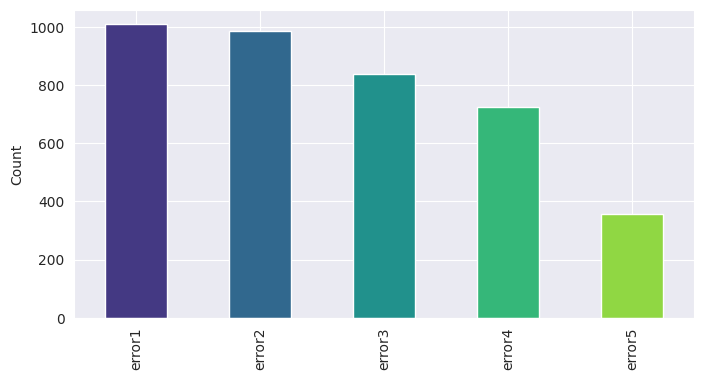

In [92]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

error_counts = errors['errorID'].value_counts()
color_palette = sns.color_palette("viridis", len(error_counts))

errors['errorID'].value_counts().plot(kind='bar', color=color_palette)
plt.ylabel('Count')

Displaying errors per machine

In [93]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

Displaying Count of Errors per Machine

In [94]:
import plotly.express as px
fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()

**EDA on Failures**

In [95]:
# Counting the number of records in failures
len(failures.index)

761

In [96]:
# Checking data type in failures
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [97]:
# Converting object to datetime
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [98]:
failures.describe

<bound method NDFrame.describe of                datetime  machineID failure
0   2015-01-05 06:00:00          1   comp4
1   2015-03-06 06:00:00          1   comp1
2   2015-04-20 06:00:00          1   comp2
3   2015-06-19 06:00:00          1   comp4
4   2015-09-02 06:00:00          1   comp4
..                  ...        ...     ...
756 2015-11-29 06:00:00         99   comp3
757 2015-12-14 06:00:00         99   comp4
758 2015-02-12 06:00:00        100   comp1
759 2015-09-10 06:00:00        100   comp1
760 2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

Displaying Count of different failure types

<ipython-input-99-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



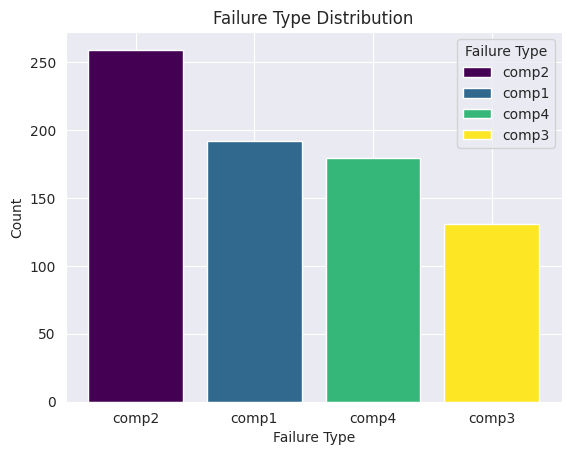

In [99]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

Displaying errors and failures for machine ID= 1

In [100]:
telemetryP = telemetry.loc[telemetry['machineID'] == 1].reset_index(drop=True)
fail1 = failures.loc[failures['machineID'] == 1]
err1 = errors.loc[errors['machineID'] == 1]

<ipython-input-101-c0e64a1595c9>:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



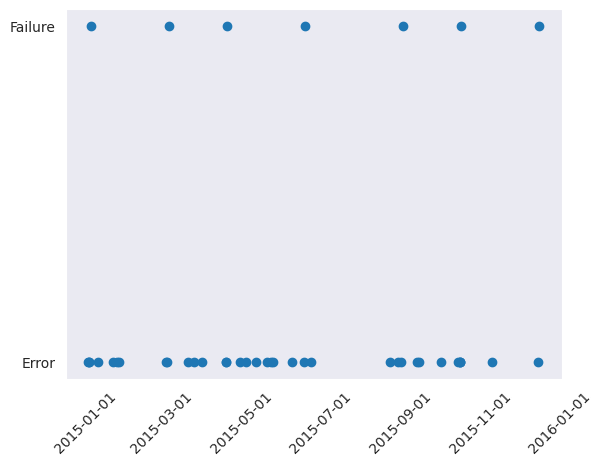

In [101]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

y_category = ['Failure'] * len(fail1) + ['Error'] * len(err1)

df_timestamp = pd.concat([fail1['datetime'], err1['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)

ax.scatter('timestamp', 'category', data=df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=45)
ax.grid()

plt.show()


**EDA on Machines**

In [102]:
len(machines.index)

100

In [103]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [104]:
machines.describe

<bound method NDFrame.describe of     machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]>

In [105]:
machines['model'] = machines['model'].astype('object')

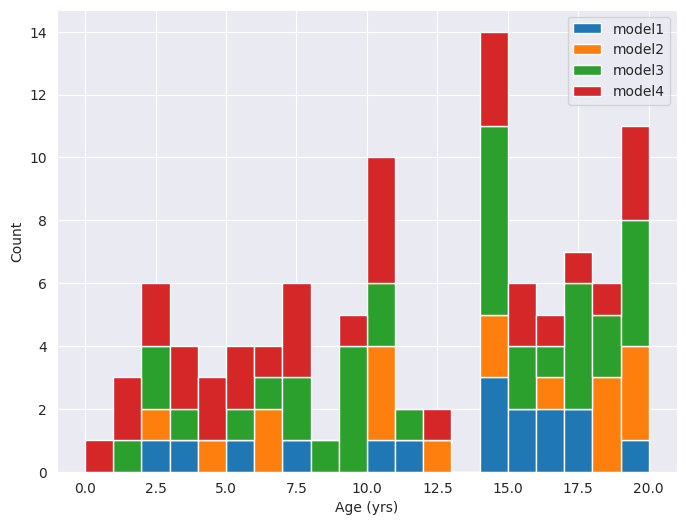

In [106]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [107]:
import plotly.express as px

fig = px.histogram(machines, x='age', color='model', barmode='stack',
                   title='Machine Age Distribution', template='plotly_dark',
                   labels={'age': 'Age', 'model': 'Model'},
                   category_orders={'model': ['model1', 'model2', 'model3', 'model4']})
fig.show()

**EDA on Maintanance**

In [108]:
len(maint)

3286

In [109]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [110]:
maint.describe

<bound method NDFrame.describe of                  datetime  machineID   comp
0     2014-06-01 06:00:00          1  comp2
1     2014-07-16 06:00:00          1  comp4
2     2014-07-31 06:00:00          1  comp3
3     2014-12-13 06:00:00          1  comp1
4     2015-01-05 06:00:00          1  comp4
...                   ...        ...    ...
3281  2015-10-10 06:00:00        100  comp3
3282  2015-10-25 06:00:00        100  comp4
3283  2015-11-09 06:00:00        100  comp4
3284  2015-12-09 06:00:00        100  comp2
3285  2015-12-24 06:00:00        100  comp2

[3286 rows x 3 columns]>

Displaying number of maintanance in different components

Text(0, 0.5, 'Count')

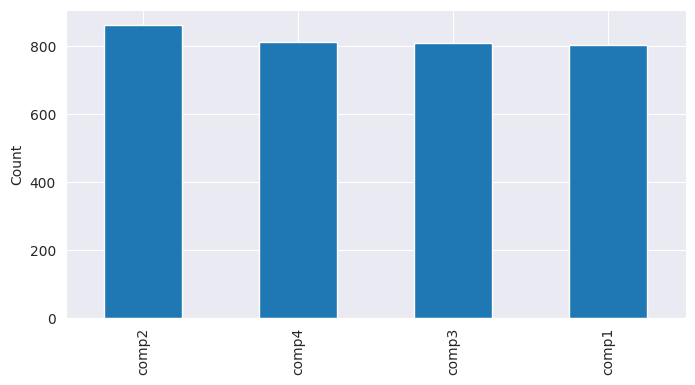

In [111]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

**EDA on Telemetry**

In [112]:
len(telemetry)

876100

In [113]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [114]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


Displaying volt for machineID = 1 between 01/01/15 to 02/01/15

Text(0, 0.5, 'voltage')

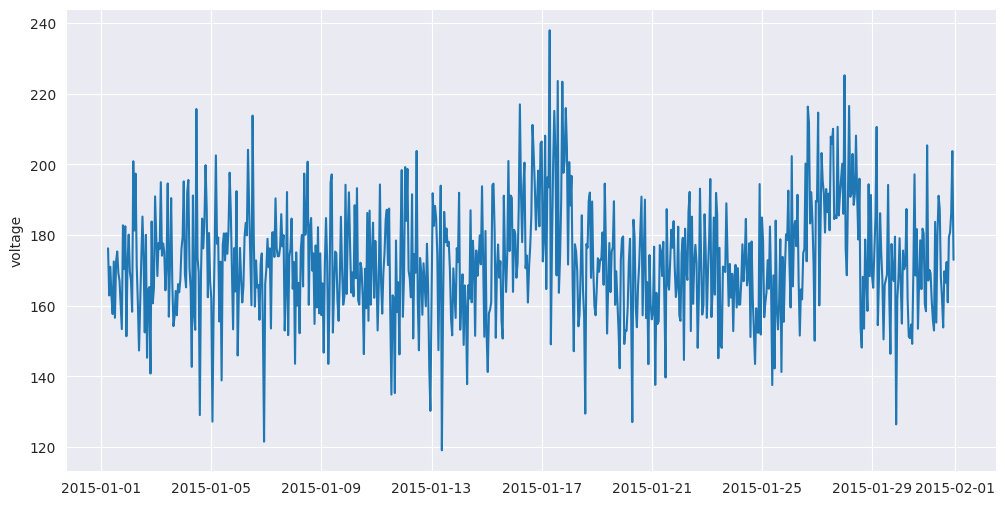

In [115]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

Text(0, 0.5, 'pressure')

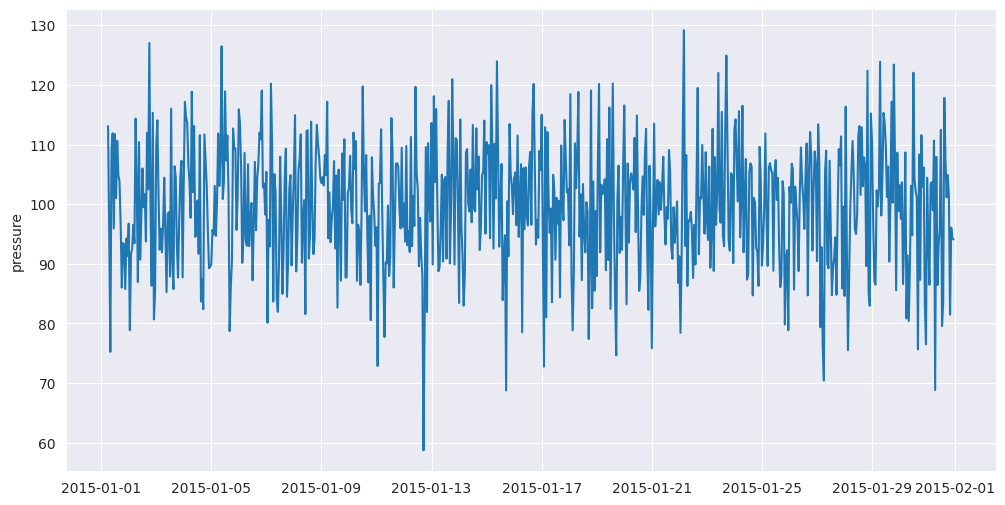

In [116]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

Text(0, 0.5, 'rotation')

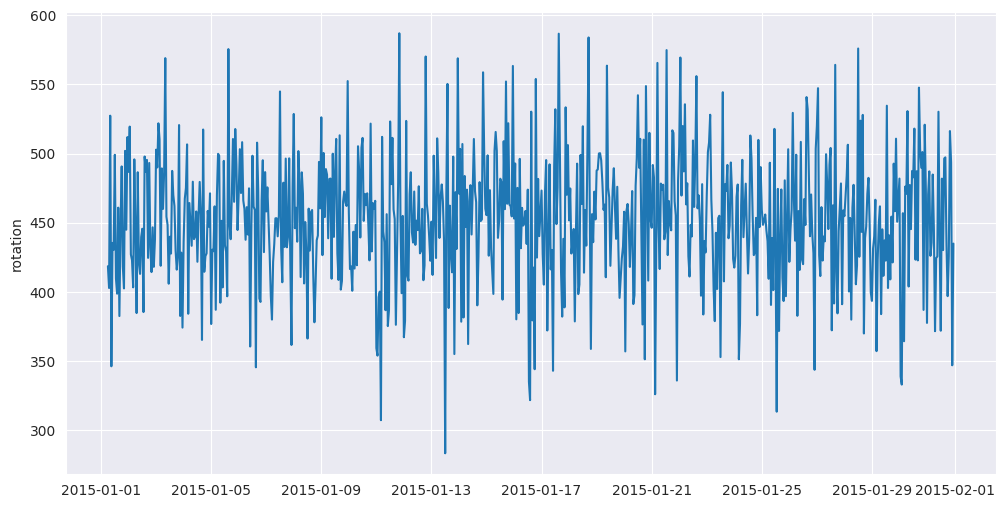

In [117]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'rotate']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['rotate'])
plt.ylabel('rotation')

Text(0, 0.5, 'vibration')

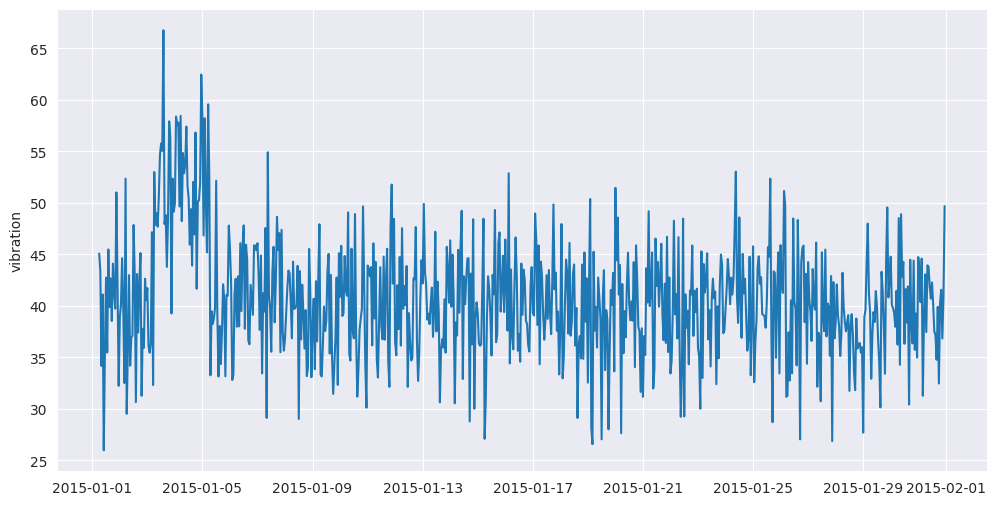

In [118]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'vibration']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['vibration'])
plt.ylabel('vibration')

In [119]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

In [120]:
machine_error_count[machine_error_count["machineID"]==23]

,machineID,errorID,error_count
108,23,error1,8
109,23,error2,9
110,23,error3,6
111,23,error4,6
112,23,error5,8


In [121]:
import plotly.express as px

fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()

#**Check Autocorellation for Machine ID = 1**#

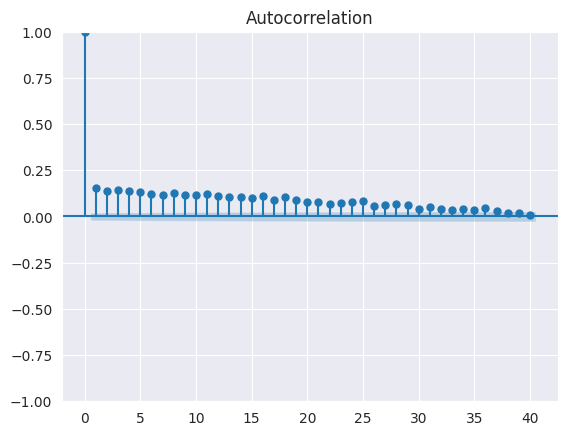

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(telemetryP['pressure'], lags = 40)
plt.show()

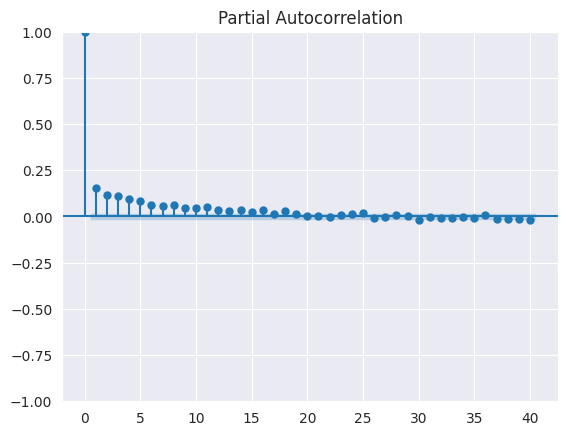

In [123]:
plot_pacf(telemetryP['pressure'], lags = 40)
plt.show()

#**Perform Feature Engineering**#

In [124]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head(10)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542
5,1,2015-01-02 00:00:00,168.779396,486.242664,90.446472,41.796657
6,1,2015-01-02 03:00:00,172.277489,477.738628,89.104865,41.232001
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637


In [125]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3H',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [126]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
std,28.863913,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609


In [127]:
telemetry_feat.head()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
23,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,101.652072,44.017022,13.716658,41.767447,11.754808,6.878286
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,101.011726,44.148324,13.741098,41.038218,11.521602,6.929500
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,101.172241,44.672216,13.915181,33.879652,11.667258,7.162152
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,100.708151,44.993232,13.583969,33.790685,11.447426,7.244618
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,99.826551,45.160570,13.590129,33.787875,11.919716,7.167877


In [128]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.head()

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0


In [129]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [130]:
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [131]:
error_count = telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876403.000000,876403.000000,876403.000000,876403.000000,876403.00000,876403.000000
mean,50.499881,0.001152,0.001127,0.000956,0.00083,0.000406
std,28.866464,0.033928,0.033557,0.030907,0.02879,0.020150
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,76.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [132]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,0.037483,0.029266,0.025117,0.025541,0.018666
std,28.863914,0.192195,0.154875,0.140627,0.158549,0.134294
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2.000000,2.000000,1.500000,3.000000,2.000000


In [133]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


In [139]:
# Identifying Days Since Last Replacement using Maintainence on a window of 24 hours

In [147]:
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID',
                    'comp1', 'comp2', 'comp3', 'comp4']

comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime',
                                b                          'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

ValueError: ignored

In [148]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

TypeError: ignored

In [ ]:
for comp in components:
    comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")

comp_rep.describe()

In [149]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,NaN,2014-06-01 06:00:00,NaN,NaN
1,2014-07-16 06:00:00,1,NaN,2014-06-01 06:00:00,NaN,2014-07-16 06:00:00
2,2014-07-31 06:00:00,1,NaN,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
3,2014-12-13 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
4,2015-01-05 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2015-01-05 06:00:00


In [151]:
final_feat = telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

ValueError: ignored

In [ ]:
final_feat.describe()

In [ ]:
labeled_features = final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(
    method='bfill', limit=7)
labeled_features = labeled_features.fillna('none')
labeled_features.head()

In [ ]:
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'),
                    pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
anai_models = []
train_dfs = []
for last_train_date, first_test_date in threshold_dates:
    print('Training on %s to %s' % (last_train_date, first_test_date))
    train_y = labeled_features.loc[labeled_features['datetime']
                                   < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    df = pd.concat([train_X, train_y], axis=1)
    train_dfs.append(df)

In [153]:
train_dfs[0].head()

NameError: ignored

In [ ]:
ai1 = anai.run(target = 'failure', df = train_dfs[0], predictor = ['xgb', 'cat','lgbm', 'gbc', 'rfc'], ensemble = False)